# Practicum 3: Model Development and Tuning

### Question 1 — The DS Problem (0 point)

In your own words, formulate the Data Science problem.


### Question 2 — Prepare the Data (5 pts)

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 


In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

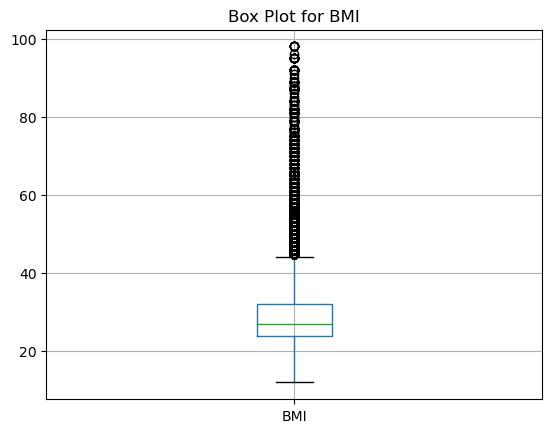

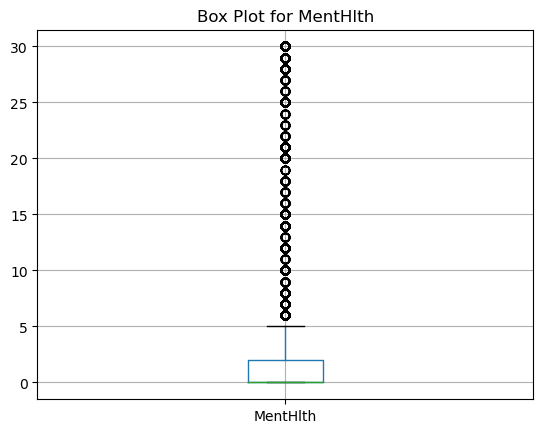

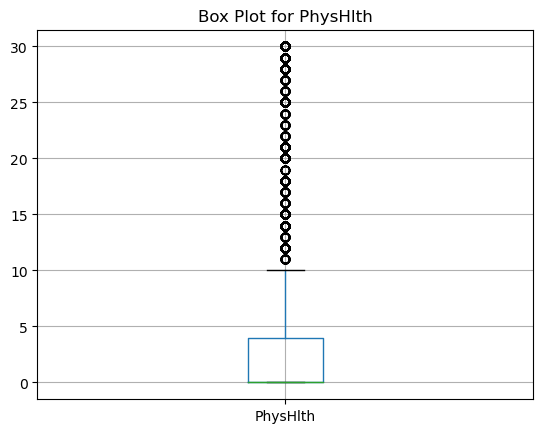

OG dataset shape: (229781, 22)
Filtered dataset shape: (5638, 22)


In [2]:
# Data Cleaning
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(df.head())

# Checking variable types 
print(df.dtypes)

# Dropping NaN and duplicate values
df = df.dropna(axis=0, how='any')
df = df.drop_duplicates()

# Describing data
print(df.describe())

# Continuous variables worth checking
cont = ['BMI', 'MentHlth', 'PhysHlth']

# Box plot for each column
for col in ['BMI', 'MentHlth', 'PhysHlth']:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

# Find outliers
def drop_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_df = df[(df[column] > upper_bound) |  (df[column] < lower_bound)]
    return filtered_df

# Drop outliers
filtered_df = drop_outliers(df, 'MentHlth')
filtered_df = drop_outliers(df, 'PhysHlth')
filtered_df = drop_outliers(df, 'BMI')

print(f"OG dataset shape: {df.shape}")
print(f"Filtered dataset shape: {filtered_df.shape}")

### Question 3 — (20 points)

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.


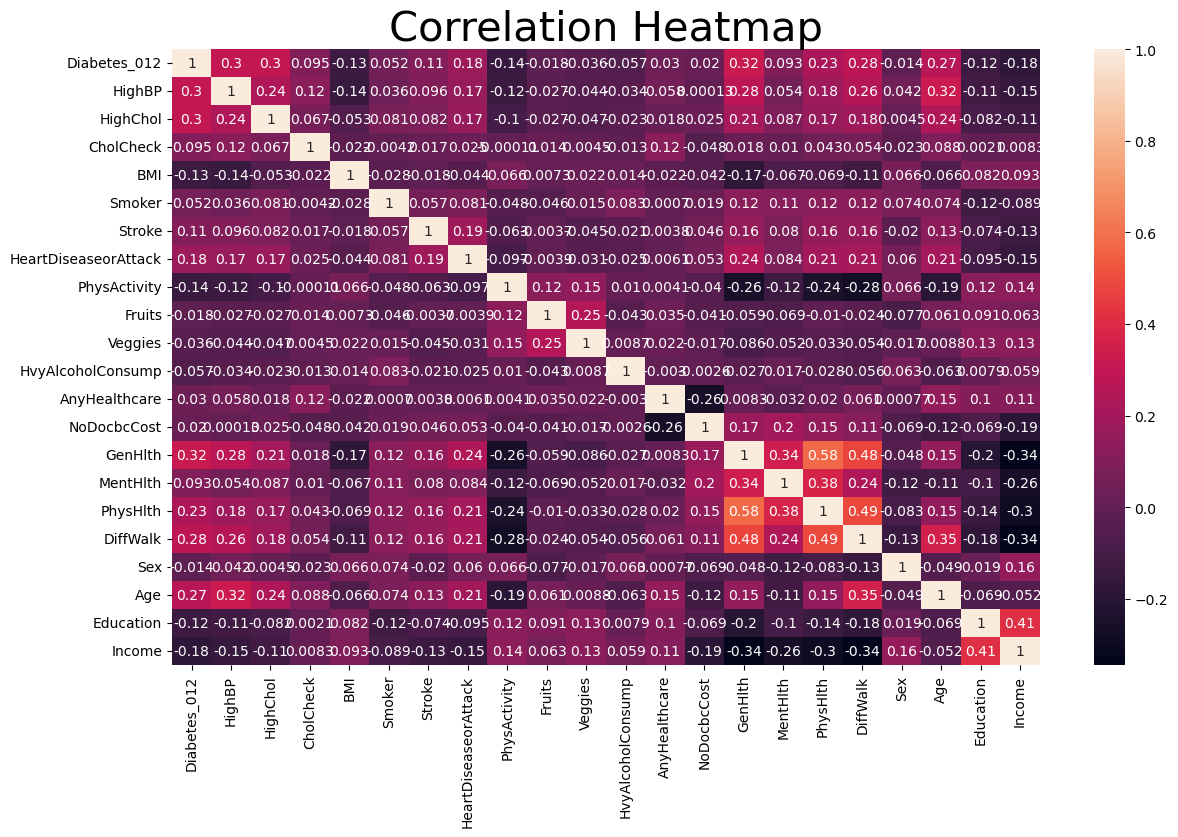

The correlation heatmap reveals significant relationships between various features in the dataset. Diabetes outcomes exhibit moderate positive correlations with BMI, age, and general health, suggesting that higher BMI, older age, and poorer general health are strongly associated with diabetes. Physical activity is negatively correlated with diabetes outcomes, indicating that increased physical activity is linked to a reduced risk of diabetes. Socioeconomic factors like income and education show weaker negative correlations with diabetes outcomes, hinting at being potentially influence.


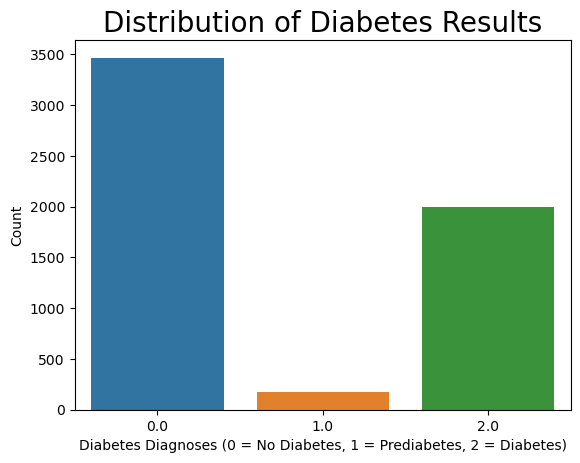

The distribution of diabetes results highlights an imbalanced dataset, with the majority of individuals having no diabetes (0), followed by fewer cases of prediabetes (1) and diabetes (2). This makes sense since the majority of the population, thankfully, does not have diabetes. This skewed distribution reflects the general population trend but also underscores the need for balanced sampling in predictive modeling.


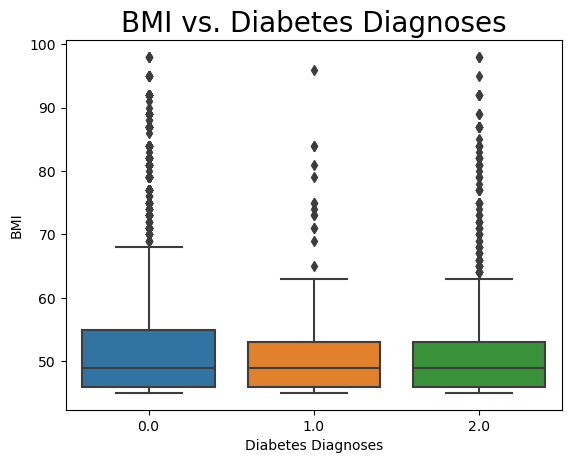

The BMI vs. diabetes diagnoses box plot indicates that median BMI increases as diabetes outcomes progress from 0 (no diabetes) to 2 (diabetes). This suggests that higher BMI is a significant risk factor for diabetes. Additionally, the wider range of BMI values among individuals with diabetes highlights the variability in how BMI relates to the condition.


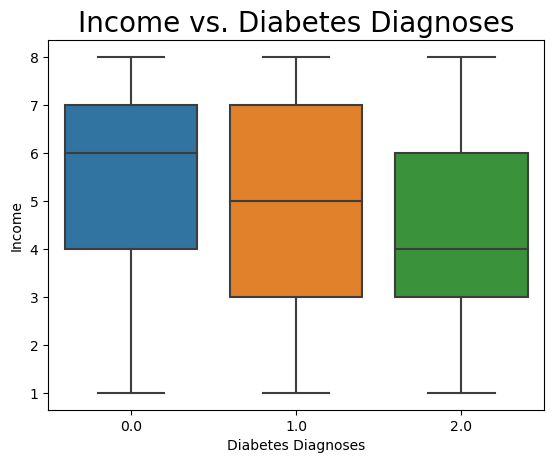

The income vs. diabetes diagnoses box plot shows that people with diabetes (2) tend to have lower median incomes compared to those without diabetes (0). The plot also shows how the range of income levels narrows as diabetes outcomes progress, implying that lower income may be linked to a higher risk of diabetes (potentially due to reduced access to healthcare or healthy lifestyle choices).


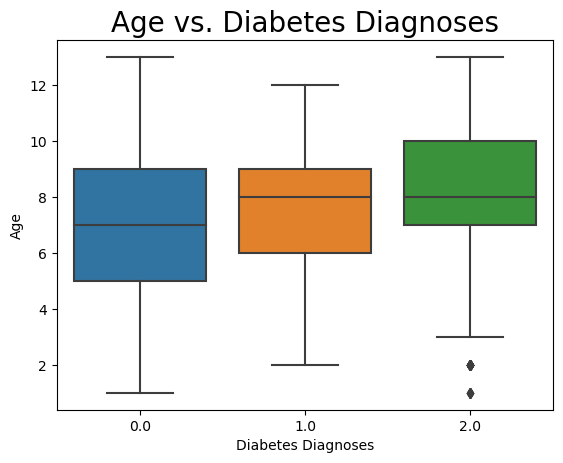

The age vs. diabetes diagnoses box plot visualizes how the median age increases as diabetes diagnoses progress from 0 (no diabetes) to 2 (diabetes), indicating that older individuals are more likely to develop diabetes. Notably, there are a few outliers in the younger age range for those diagnosed with diabetes, emphasizing that while diabetes is more common in older populations, it can still affect younger individuals. This plot highlights the strong influence of age on diabetes risk.


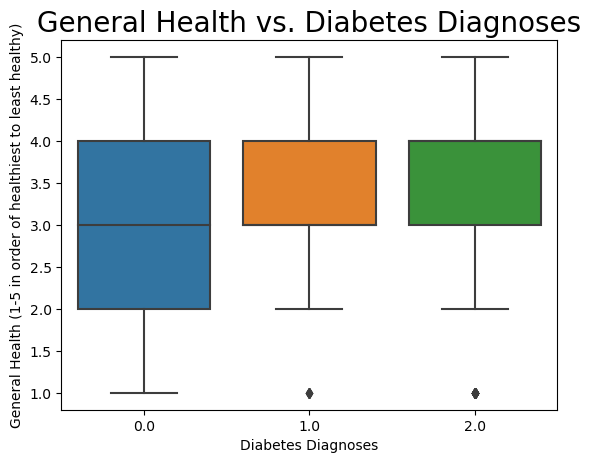

Lastly, the general health vs. diabetes diagnoses box plot illustrates that self-reported general health worsens with the progression of diabetes diagnoses. Those with diabetes (2) report the poorest health, with the highest median scores, reflecting a clear decline in overall health as diabetes advances. This reinforces the strong association between diabetes and deteriorating physical health.


In [3]:
# Exploratory data analysis

# Correlation map 
plt.figure(figsize=(14,8))
correlation_matrix = filtered_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap", size=30)
plt.show()
print("The correlation heatmap reveals significant relationships between various features in the dataset. Diabetes outcomes exhibit moderate positive correlations with BMI, age, and general health, suggesting that higher BMI, older age, and poorer general health are strongly associated with diabetes. Physical activity is negatively correlated with diabetes outcomes, indicating that increased physical activity is linked to a reduced risk of diabetes. Socioeconomic factors like income and education show weaker negative correlations with diabetes outcomes, hinting at being potentially influence.")

# Diabetes Diagnoses distribution
sns.countplot(x="Diabetes_012", data=filtered_df)
plt.title("Distribution of Diabetes Results", size=20)
plt.xlabel("Diabetes Diagnoses (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)")
plt.ylabel("Count")
plt.show()
print("The distribution of diabetes results highlights an imbalanced dataset, with the majority of individuals having no diabetes (0), followed by fewer cases of prediabetes (1) and diabetes (2). This makes sense since the majority of the population, thankfully, does not have diabetes. This skewed distribution reflects the general population trend but also underscores the need for balanced sampling in predictive modeling.")

# BMI vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="BMI", data=filtered_df)
plt.title("BMI vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("BMI")
plt.show()
print("The BMI vs. diabetes diagnoses box plot indicates that median BMI increases as diabetes outcomes progress from 0 (no diabetes) to 2 (diabetes). This suggests that higher BMI is a significant risk factor for diabetes. Additionally, the wider range of BMI values among individuals with diabetes highlights the variability in how BMI relates to the condition.")

# Income vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="Income", data=filtered_df)
plt.title("Income vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("Income")
plt.show()
print("The income vs. diabetes diagnoses box plot shows that people with diabetes (2) tend to have lower median incomes compared to those without diabetes (0). The plot also shows how the range of income levels narrows as diabetes outcomes progress, implying that lower income may be linked to a higher risk of diabetes (potentially due to reduced access to healthcare or healthy lifestyle choices).")

# Age vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="Age", data=filtered_df)
plt.title("Age vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("Age")
plt.show()
print("The age vs. diabetes diagnoses box plot visualizes how the median age increases as diabetes diagnoses progress from 0 (no diabetes) to 2 (diabetes), indicating that older individuals are more likely to develop diabetes. Notably, there are a few outliers in the younger age range for those diagnosed with diabetes, emphasizing that while diabetes is more common in older populations, it can still affect younger individuals. This plot highlights the strong influence of age on diabetes risk.")

# General Health vs. Diabetes Diagnoses
sns.boxplot(x="Diabetes_012", y="GenHlth", data=filtered_df)
plt.title("General Health vs. Diabetes Diagnoses", size=20)
plt.xlabel("Diabetes Diagnoses")
plt.ylabel("General Health (1-5 in order of healthiest to least healthy)")
plt.show()
print("Lastly, the general health vs. diabetes diagnoses box plot illustrates that self-reported general health worsens with the progression of diabetes diagnoses. Those with diabetes (2) report the poorest health, with the highest median scores, reflecting a clear decline in overall health as diabetes advances. This reinforces the strong association between diabetes and deteriorating physical health.")




### Question 4a — (20 points)

Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.


In [4]:

# Function to test significance and print results
def test_significance(feature_name, anova_result):
    print(f"ANOVA Test for {feature_name} vs. Diabetes Diagnosis: F-statistic={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")
    if anova_result.pvalue < 0.05:
        print(f"Result: {feature_name} shows a statistically significant difference across diabetes categories (p < 0.05).\n")
    else:
        print(f"Result: {feature_name} does NOT show a statistically significant difference across diabetes categories (p >= 0.05).\n")

# ANOVA for BMI vs. Diabetes Diagnosis
anova_bmi = f_oneway(
    filtered_df[filtered_df['Diabetes_012'] == 0]['BMI'],
    filtered_df[filtered_df['Diabetes_012'] == 1]['BMI'],
    filtered_df[filtered_df['Diabetes_012'] == 2]['BMI']
)
test_significance("BMI", anova_bmi)

# ANOVA for Income vs. Diabetes Diagnosis
anova_income = f_oneway(
    filtered_df[filtered_df['Diabetes_012'] == 0]['Income'],
    filtered_df[filtered_df['Diabetes_012'] == 1]['Income'],
    filtered_df[filtered_df['Diabetes_012'] == 2]['Income']
)
test_significance("Income", anova_income)

# ANOVA for Age vs. Diabetes Diagnosis
anova_age = f_oneway(
    filtered_df[filtered_df['Diabetes_012'] == 0]['Age'],
    filtered_df[filtered_df['Diabetes_012'] == 1]['Age'],
    filtered_df[filtered_df['Diabetes_012'] == 2]['Age']
)
test_significance("Age", anova_age)


ANOVA Test for BMI vs. Diabetes Diagnosis: F-statistic=50.12, p-value=0.0000
Result: BMI shows a statistically significant difference across diabetes categories (p < 0.05).

ANOVA Test for Income vs. Diabetes Diagnosis: F-statistic=94.75, p-value=0.0000
Result: Income shows a statistically significant difference across diabetes categories (p < 0.05).

ANOVA Test for Age vs. Diabetes Diagnosis: F-statistic=215.29, p-value=0.0000
Result: Age shows a statistically significant difference across diabetes categories (p < 0.05).



I perform 3 ANOVA tests on the correlation of continous variables against a categorical. Here, I test if BMI, Income level, and age show a statistically significant difference between the categories of Diabetic(nondiabetic, prediabetic, and diabetic). 

The ANOVA test for all three features returned a p-value that rounded down to 0.0000 - meaning there is effectively 0% probability that the differences in BMI, Age, and Income across the categories of diabetic are caused by random chance. We are able to reject the null hypothesis that there is no correlation between:

BMI and Diabetic Status
Income and Diabetic Status
Age and Diabetic Status

And declare each relationship statistically significant.

Because of this correlation, it is useful to interrogate whether these features would strengthen an ML classification model that would classify a person into nondiabetic, prediabetic, and diabetic. BMI would likely be a strong predictive feature, as BMI is often indicative of high body fat percentage -- which has been established as a a risk factor for type 2 diabetes(See 1). Income is predictive of many other diseases and causes of mortality, which indicates some processes by which lower income people see worsened health outcomes. Frequent and adequate medical visits are not distributed equally across income. Thus, these populations may see worsened general medical outcomes. This too could be an important consideration when classifying a person into a diabetic status. Lastly, age is a strong predictor of diabetes, as studies show that a body's cells become less sensitive to insulin as they age, leading to the symptoms of diabetes. With this link established, age too could be an important consideration in this predictive model.

### [Optional] Question 4b — (10 points)
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following
(1) Feature engineering: Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.
OR
(2) Statistical tests: Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

In [5]:
# Selecting the continuous variables to apply PCA
cont_cols = ['BMI', 'MentHlth', 'PhysHlth']

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df[cont_cols])

# Apply PCA to the scaled data
pca = PCA(n_components=1)  # We are interested in only the first principal component
principal_component = pca.fit_transform(scaled_data)

# Calculate the percentage of variance captured by the first principal component
explained_variance = pca.explained_variance_ratio_[0] * 100  # Multiply by 100 to get percentage

# Print the percentage of variance captured
print(f"Percentage of variance captured by PCA_1: {explained_variance:.2f}%")

# Add the first principal component to the dataframe
filtered_df['PCA_1'] = principal_component

# Perform ANOVA test to check if PCA_1 is significantly different across Diabetes_012 categories
anova_result = f_oneway(
    filtered_df[filtered_df['Diabetes_012'] == 0]['PCA_1'],
    filtered_df[filtered_df['Diabetes_012'] == 1]['PCA_1'],
    filtered_df[filtered_df['Diabetes_012'] == 2]['PCA_1']
)

# Print the ANOVA results
print(f"ANOVA Test for PCA_1 vs. Diabetes Diagnosis: F-statistic={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")

# Interpret the results
if anova_result.pvalue < 0.05:
    print("The first principal component (PCA_1) is statistically significant (p < 0.05). It will be included in the ML model.\n")
else:
    print("The first principal component (PCA_1) is NOT statistically significant (p >= 0.05). It will NOT be included in the ML model.\n")

Percentage of variance captured by PCA_1: 46.60%
ANOVA Test for PCA_1 vs. Diabetes Diagnosis: F-statistic=136.13, p-value=0.0000
The first principal component (PCA_1) is statistically significant (p < 0.05). It will be included in the ML model.



/var/folders/f4/nf7__08x2q70k8r8vtyrqlkr0000gn/T/ipykernel_95367/2872367408.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PCA_1'] = principal_component


### Question 5 — (5 points)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).


In [6]:
# Features and target
features = ['BMI', 'Income', 'Age', 'PCA_1']
target = 'Diabetes_012'

# Create a train/test split (80% train, 20% test)
X = filtered_df[features]
y = filtered_df[target]

# Split the data into training and testing sets (random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numeric data using StandardScaler (BMI, Income, Age, PCA_1)
scaler = StandardScaler()

# Normalize the numeric features in the training data, and then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the results of the scaling
print("Training set after scaling:")
print(pd.DataFrame(X_train_scaled, columns=features).head())

print("\nTesting set after scaling:")
print(pd.DataFrame(X_test_scaled, columns=features).head())

Training set after scaling:
        BMI    Income       Age     PCA_1
0  1.703076  1.313547 -0.444511 -1.172009
1 -0.735683  1.313547 -0.068245  0.302667
2 -0.735683  0.443316 -1.197044 -0.519597
3 -0.548086 -1.732262  0.684287  0.761579
4 -0.641885  0.878432 -1.573310 -0.325747

Testing set after scaling:
        BMI    Income       Age     PCA_1
0 -0.641885  1.313547 -0.444511 -0.707965
1  3.391447  0.878432  1.060553 -1.258103
2 -0.360490  0.008201 -0.068245  0.546426
3 -0.548086  1.313547  0.308021 -0.726527
4 -0.548086  0.443316 -0.068245 -0.500118


Here, I z-score normalize the X variables to set the mean to 0 and the standard deviation to 1. Then, I apply an 80/20 train test split.

### Question 6 — (30 points)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.


## SVM

In [7]:
#initialize the classifier
svm = SVC() #the default kernel is rbf
svm.fit(X_train_scaled, y_train) #fit the data

#predict the labels for the test set
y_pred   = svm.predict(X_test_scaled)

#evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(round(svm.score(X_test_scaled, y_test), 2)))

#get the classification report
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred, target_names = target_names))

The accuracy of the model is: 0.66
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       703
           1       0.00      0.00      0.00        34
           2       0.56      0.40      0.47       391

    accuracy                           0.66      1128
   macro avg       0.42      0.41      0.41      1128
weighted avg       0.63      0.66      0.63      1128



/Users/jacobgagnon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobgagnon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobgagnon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#setup the parameter grid to try values of c and gamma ranging from 0.01 to 100.
params = {"C": [1, 10, 100, 1000],
          "gamma": [0.01, 0.1, 1, 10]}

#initialize classifier
svm = SVC()

#initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score=True)
svm_grid.fit(X_train_scaled, y_train)

print('Best parameters:', svm_grid.best_params_) #print the best parameters
print('Best score:', round(svm_grid.best_score_, 2))  #print the best score

Best parameters: {'C': 100, 'gamma': 0.1}
Best score: 0.65


In [9]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
9,0.666630,0.003068,0.649002,0.005636
5,0.659867,0.004724,0.647672,0.003737
1,0.654102,0.002460,0.647007,0.007341
2,0.685698,0.001709,0.646341,0.010400
12,0.653215,0.002241,0.646120,0.003534


## k-NN

In [10]:
#initialize the classifier and set the number of neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

#predict the labels for the test set
y_pred = knn.predict(X_test_scaled)

#evaluate the model using Mean Squared Error
mse = round(mean_squared_error(y_test, y_pred), 2)
print(f"Initial Model MSE (k = 5): {mse}")

#evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(round(knn.score(X_test_scaled, y_test), 2)))

#get the classification report
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred, target_names = target_names))

Initial Model MSE (k = 5): 1.47
The accuracy of the model is: 0.61
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       703
           1       0.00      0.00      0.00        34
           2       0.46      0.39      0.42       391

    accuracy                           0.61      1128
   macro avg       0.38      0.38      0.38      1128
weighted avg       0.58      0.61      0.59      1128



In [11]:
#setup the parameter grid to try values of n_neighbors, weights, and metric
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#initialize classifier
knn = KNeighborsClassifier()

#initialize Grid Search with Cross Validation
knn_grid = GridSearchCV(estimator = knn, param_grid = knn_params, cv=5, return_train_score=True)
knn_grid.fit(X_train_scaled, y_train)

print('Best parameters:', knn_grid.best_params_) #print the best parameters
print('Best score:', round(knn_grid.best_score_, 2))  #print the best score

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best score: 0.63


In [12]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(knn_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
6,0.706707,0.002254,0.633259,0.012956
14,0.705100,0.001830,0.628825,0.008367
4,0.718958,0.003506,0.623503,0.011808
12,0.719956,0.004068,0.623282,0.010433
15,0.954435,0.002093,0.618182,0.013553


## Random Forest

In [13]:
#initialize the classifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_scaled, y_train)

#predict the labels for the test set
y_pred   = rf.predict(X_test_scaled)

#evaluate the model using mean squared error
mse = round(mean_squared_error(y_test, y_pred), 2)
print('The mse of the model is: {}'.format(mse))

#evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(round(rf.score(X_test_scaled, y_test), 2)))

#get the classification report
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred, target_names = target_names))

The mse of the model is: 1.43
The accuracy of the model is: 0.61
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       703
           1       0.00      0.00      0.00        34
           2       0.48      0.43      0.46       391

    accuracy                           0.61      1128
   macro avg       0.39      0.39      0.39      1128
weighted avg       0.59      0.61      0.60      1128



In [14]:
#setup the parameter grid to try values of n_estimators, max_depth, and min_samples_split
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

#initialize classifier
rf = RandomForestClassifier(random_state = 42)

#initialize Grid Search with Cross Validation
rf_grid = GridSearchCV(estimator = rf, param_grid = rf_params, cv=5, return_train_score=True)
rf_grid.fit(X_train_scaled, y_train)

print('Best parameters:', rf_grid.best_params_) #print the best parameters
print('Best score:', round(rf_grid.best_score_, 2))  #print the best score

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.64


In [15]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
15,0.769180,0.003658,0.638359,0.013925
16,0.769956,0.004520,0.636364,0.011920
12,0.788636,0.001514,0.636364,0.009716
17,0.770843,0.003157,0.634368,0.011572
14,0.791630,0.002070,0.633259,0.011720


### Question 7 — (15 points)

Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

### Question 8 — (5 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


Note:

Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
Use markdown cells to explain your observations about the data.
Include the names of all teammates on all submissions
Ensure that your Python code is in a code cell and that it executes without errors.